<a href="https://colab.research.google.com/github/eswar554/Karkhana_assignment/blob/main/karkana_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class MobiusStrip:
    def __init__(self, radius=1.0, width=0.3, points=100):
        self.radius = radius
        self.width = width
        self.points = points

        #mesh grid for u and v
        self.u = np.linspace(0, 2 * np.pi, self.points)
        self.v = np.linspace(-self.width / 2, self.width / 2, self.points)
        self.u_grid, self.v_grid = np.meshgrid(self.u, self.v)

        #compute coordinates
        self.x, self.y, self.z = self.get_coordinates()

    def get_coordinates(self):
        u = self.u_grid
        v = self.v_grid

        x = (self.radius + v * np.cos(u / 2)) * np.cos(u)
        y = (self.radius + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)

        return x, y, z

    def plot_strip(self):
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.x, self.y, self.z, cmap='coolwarm', edgecolor='k', linewidth=0.1)

        ax.set_title("Mobius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.show()

    def calculate_surface_area(self):
        total_area = 0
        du = self.u[1] - self.u[0]
        dv = self.v[1] - self.v[0]

        for i in range(self.points - 1):
            for j in range(self.points - 1):
                #4 points of small square
                p1 = np.array([self.x[i, j], self.y[i, j], self.z[i, j]])
                p2 = np.array([self.x[i+1, j], self.y[i+1, j], self.z[i+1, j]])
                p3 = np.array([self.x[i, j+1], self.y[i, j+1], self.z[i, j+1]])

                vec1 = p2 - p1
                vec2 = p3 - p1

                # area of small parallelogram
                area = np.linalg.norm(np.cross(vec1, vec2))
                total_area += area

        return total_area

    def calculate_edge_length(self):
        total_length = 0
        v = self.width / 2
        u_values = self.u

        #boundary points
        x = (self.radius + v * np.cos(u_values / 2)) * np.cos(u_values)
        y = (self.radius + v * np.cos(u_values / 2)) * np.sin(u_values)
        z = v * np.sin(u_values / 2)

        for i in range(len(u_values) - 1):
            p1 = np.array([x[i], y[i], z[i]])
            p2 = np.array([x[i+1], y[i+1], z[i+1]])
            total_length += np.linalg.norm(p2 - p1)

        return total_length


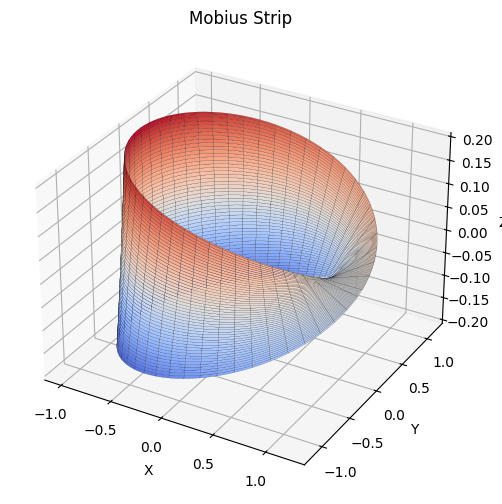

Surface Area ≈ 2.5165
Edge Length ≈ 6.3141


In [7]:
mobius = MobiusStrip(radius=1.0, width=0.4, points=100)
mobius.plot_strip()

area = mobius.calculate_surface_area()
length = mobius.calculate_edge_length()

print(f"Surface Area ≈ {area:.4f}")
print(f"Edge Length ≈ {length:.4f}")

**How the Code Is Structured**
The code is organized around a class MobiusStrip with the following structure:

Initialization (__init__):

Takes radius, width, and points (resolution)

Generates u, v mesh grid

Computes coordinates using parametric equations

get_coordinates():

Implements Möbius parametric equations to compute the 3D surface

plot_strip():

Visualizes the strip in 3D using Matplotlib

calculate_surface_area():

Uses nested loops and cross product of vectors on the mesh to estimate area

calculate_edge_length():

Approximates the length of the boundary by summing distances between edge points

This modular structure makes the code easy to read, debug, and extend.





**How Surface Area Was Approximated**

The surface is divided into small rectangles (grid cells) on the (u, v) domain

For each cell:

We take 3 corners and form two vectors

Use the cross product of these vectors to estimate a parallelogram area

Add all such small areas to get total surface area

This is a basic form of numerical surface integration





**Challenges Faced**

The Möbius strip is a non-orientable surface with a twist, so:

Care is needed in grid generation to ensure correct geometry

Avoiding advanced NumPy operations (like gradients and stacking) while keeping accuracy was tricky

Approximation errors may arise due to:

Low resolution (grid too coarse)

Simplified surface estimation

Keeping it easy for beginners while still accurate was the main goal